# Visualizing Relationships of random variables

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

sns.set_context('talk')

In [3]:
url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df.head(3)

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_GROSS,salary_monthly_NET,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Yes, they were paid by my employer",No,Yes,Consultant,None,None,None,None,None,None,GNU/Linux,Android,No,0.0,Gross,Full-Time,53000.0,43000.0,NaN,1,1,No,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Yes, they were paid by myself, Yes, they were ...",No,Yes,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",None,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Gross,Full-Time,79000.0,63000.0,NaN,2,2,Less than a salary,One,10.0,1,Never,No,201-500,Other industries,8,9
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,NaN,NaN,"Yes, they were paid by myself, Yes, they were ...",No,Yes,Infosec,"Linux, VMWare",None,None,None,None,None,Windows,iOS,No,0.0,Percentage of my salary,Full-Time,160000.0,127000.0,NaN,3,3,One salary,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9


## Numerical random variables

Machine learning algorithms strongly depend on providing correlated information of your input with the output, and removing duplicated information, that is, data that is correlated. For example: 

- If you have annotated values of house prices in Melbourne, that is, we want to predict the prices of houses in Melbourne according to other sales in the zone. The objective is to find a random variable (column) that is correlated to the

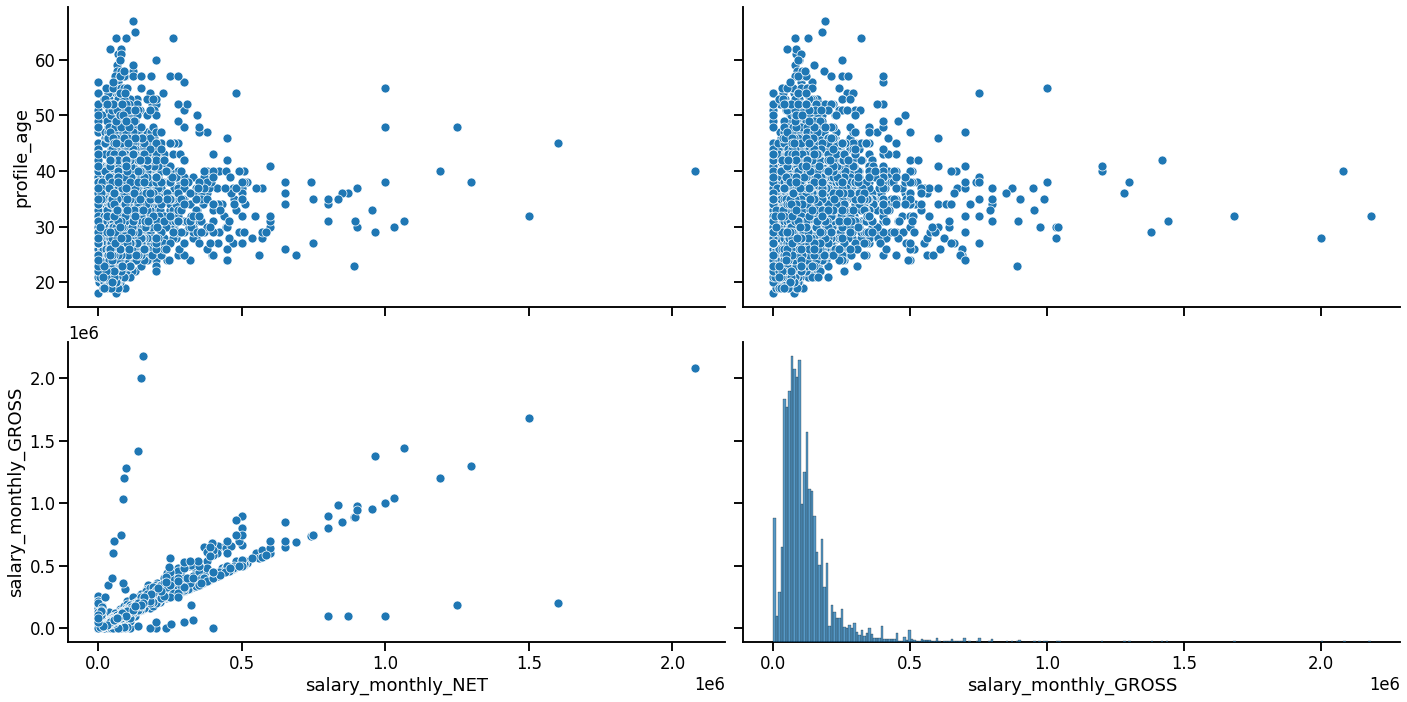

In [5]:
max_age = 99
sns.pairplot(data=df[df.profile_age < max_age],
             y_vars=['profile_age', 'salary_monthly_GROSS'],
             x_vars=['salary_monthly_NET', 'salary_monthly_GROSS'],
             aspect=2, height=5)

In [6]:
df[["salary_monthly_NET", "salary_monthly_GROSS"]].corr()

,salary_monthly_NET,salary_monthly_GROSS
salary_monthly_NET,1.000000,0.833335
salary_monthly_GROSS,0.833335,1.000000


In [7]:
df[["profile_age", "salary_monthly_GROSS"]].corr()

,profile_age,salary_monthly_GROSS
profile_age,1.000000,-0.006752
salary_monthly_GROSS,-0.006752,1.000000


## Categorical Random Variables

In [8]:
sorted_studies_levels = ["Primary", "Secondary", "Terciary", "University", "Postgraduate", "Doctorate", "Postdoc"]
pd.crosstab(df.profile_gender, df.profile_studies_level, margins=True)[sorted_studies_levels + ["All"]]

profile_studies_level,Primary,Secondary,Terciary,University,Postgraduate,Doctorate,Postdoc,All
profile_gender,,,,,,,,
Female,0,24,158,667,85,8,0,942
Male,2,424,970,3447,256,19,4,5122
Other,0,1,7,19,1,3,0,31
All,2,449,1135,4133,342,30,4,6095


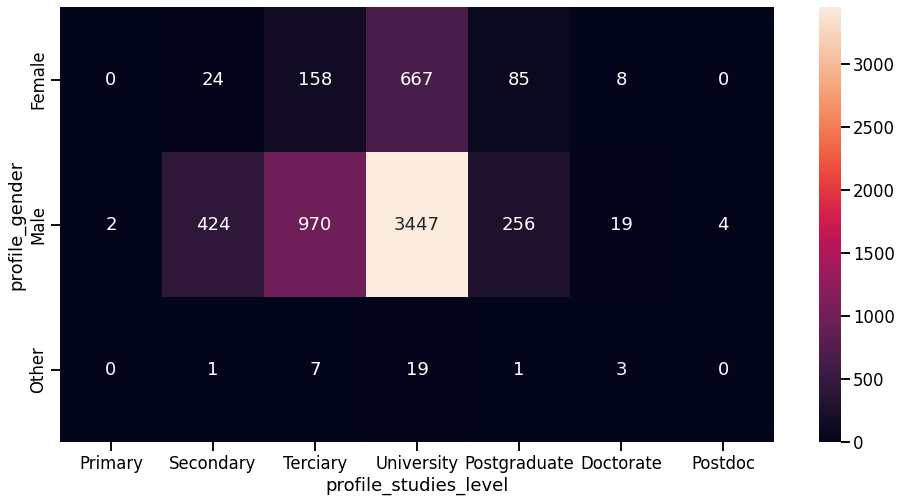

In [9]:
fig = plt.figure(figsize=(16, 8))
exp = pd.crosstab(df.profile_gender,
                  df.profile_studies_level)[sorted_studies_levels]
sns.heatmap(exp, annot=True, fmt='g')

In [10]:
pd.crosstab(df.profile_gender, df.profile_studies_level, normalize=True, margins=True)[sorted_studies_levels + ["All"]]

profile_studies_level,Primary,Secondary,Terciary,University,Postgraduate,Doctorate,Postdoc,All
profile_gender,,,,,,,,
Female,0.000000,0.003938,0.025923,0.109434,0.013946,0.001313,0.000000,0.154553
Male,0.000328,0.069565,0.159147,0.565546,0.042002,0.003117,0.000656,0.840361
Other,0.000000,0.000164,0.001148,0.003117,0.000164,0.000492,0.000000,0.005086
All,0.000328,0.073667,0.186218,0.678097,0.056112,0.004922,0.000656,1.000000


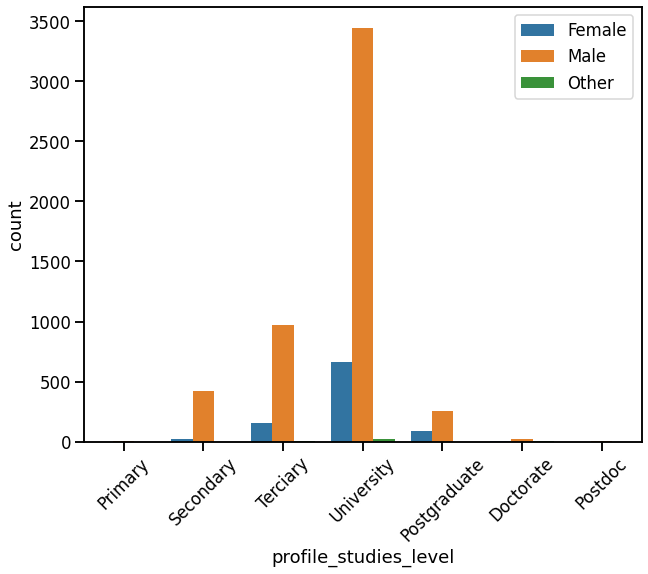

In [11]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data=df, x="profile_studies_level", hue=df.profile_gender, order=sorted_studies_levels)
plt.xticks(rotation=45)
plt.legend(loc='upper right')

## Mixing categorical and numerical variables

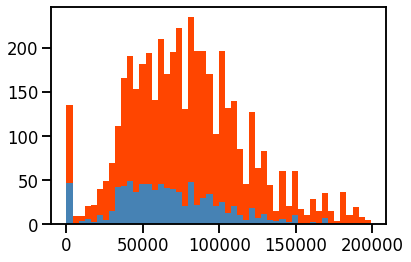

In [17]:
df_lt_200k_salary = df[df["salary_monthly_NET"] < 200000]

df_male = df_lt_200k_salary[df_lt_200k_salary['profile_gender'] == 'Male']
df_female = df_lt_200k_salary[df_lt_200k_salary['profile_gender'] == 'Female']

plt.hist(df_male["salary_monthly_NET"], color='orangered', bins=50)
plt.hist(df_female["salary_monthly_NET"], color='steelblue', bins=50)
plt.show()

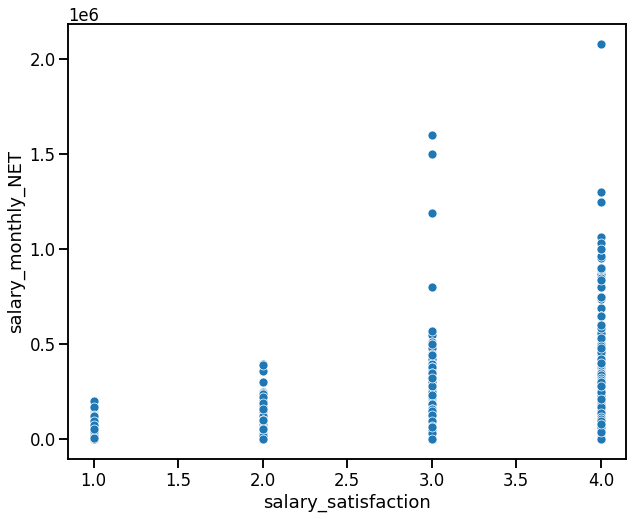

In [15]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df[df.profile_age < max_age],
                y='salary_monthly_NET',
                x='salary_satisfaction')

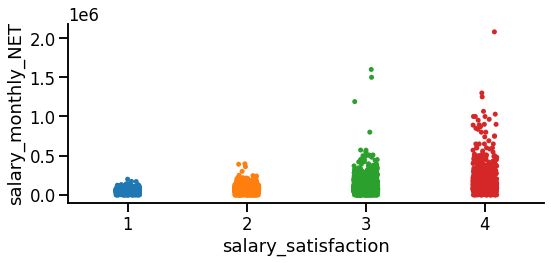

In [19]:
sns.catplot(data=df[df.profile_age < max_age],
            y='salary_monthly_NET',
            x='salary_satisfaction',
            height=4,
            aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


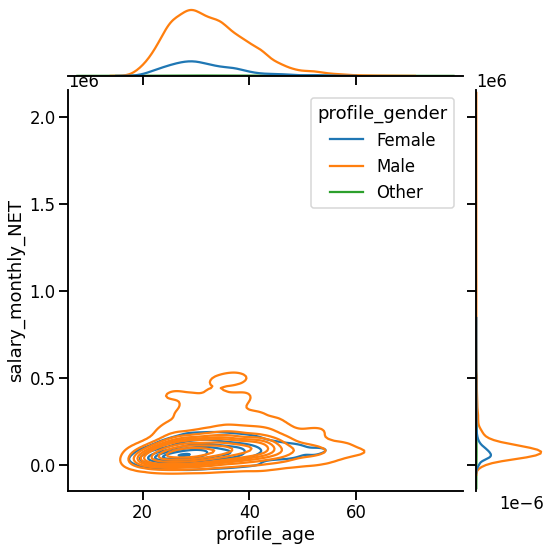

In [20]:
sns.jointplot(data=df[df.profile_age < max_age],
              x='profile_age',
              y='salary_monthly_NET',
              hue='profile_gender',
              kind='kde',
              height=8)